<a href="https://colab.research.google.com/github/gpetrini/AKB_2019/blob/master/AKB_2019_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

In [0]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import datetime
from statsmodels.tsa.stattools import grangercausalitytests as Granger
from IPython.display import Markdown, display
sns.set_context('paper')

start = datetime.datetime(1951, 12, 1)
end = datetime.datetime(2019, 3, 1)

# Getting data

In [0]:
df = web.DataReader(
    [
        'GDP',
        'PRFI',
        'PNFI',
        'TCU'
    ], 
    'fred', 
    start, end
)
df['TCU'] = df['TCU']/100
df['H-GFI'] = df['PRFI']/df['PNFI']
df['H-GDP'] = df['PRFI']/df['GDP']
df['Investment share'] = df['PNFI']/df['GDP']
df['Housing share'] = df['PRFI']/df['GDP']
df['Year'] = df.index.year
df = df.resample('Q').last()
df['gY'] = df['GDP'].pct_change()
df['Moving average GDP growth rate'] = df['GDP'].rolling(4).mean().pct_change()
df.index.name = ''
df.head()

,GDP,PRFI,PNFI,TCU,H-GFI,H-GDP,Investment share,Housing share,Year,gY,Moving average GDP growth rate
,,,,,,,,,,,
1952-03-31,359.820,18.269,35.131,NaN,0.520025,0.050773,0.097635,0.050773,1952,NaN,NaN
1952-06-30,361.030,18.763,35.765,NaN,0.524619,0.051971,0.099064,0.051971,1952,0.003363,NaN
1952-09-30,367.701,18.754,32.892,NaN,0.570169,0.051003,0.089453,0.051003,1952,0.018478,NaN
1952-12-31,380.812,19.647,35.816,NaN,0.548554,0.051592,0.094052,0.051592,1952,0.035657,NaN
1953-03-31,387.980,19.982,37.791,NaN,0.528750,0.051503,0.097405,0.051503,1953,0.018823,0.019165


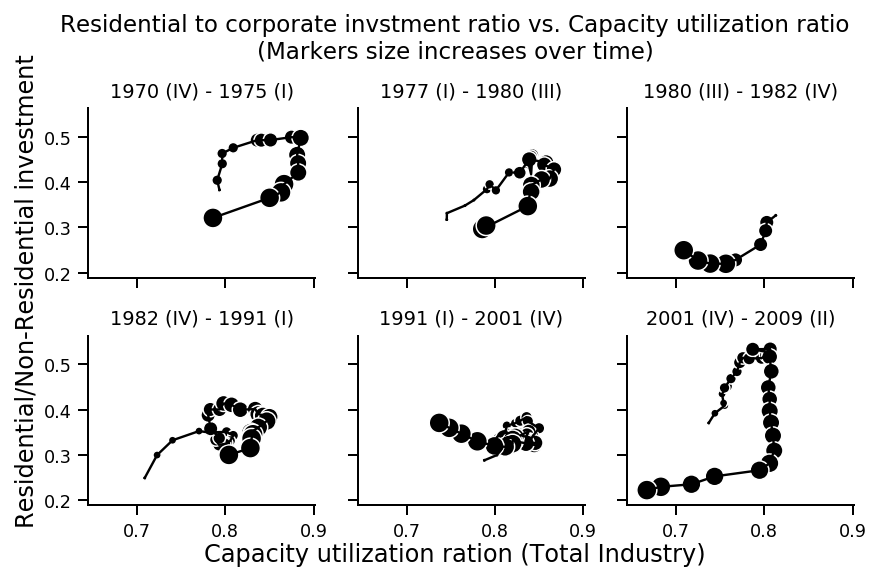

In [0]:
fig, ax = plt.subplots(2,3, sharex=True, sharey=True, squeeze=False)

sns.scatterplot(y = 'H-GFI', x='TCU', data=df["1970-12":"1975-01"], ax=ax[0,0], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'H-GFI', x='TCU', data=df["1970-12":"1975-01"], ax=ax[0,0], sort=False, color = 'black')
ax[0,0].set_title("1970 (IV) - 1975 (I)")

sns.scatterplot(y = 'H-GFI', x='TCU', data=df["1975-01":"1980-10"], ax=ax[0,1], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'H-GFI', x='TCU', data=df["1975-01":"1980-10"], ax=ax[0,1], sort=False, color = 'black')
ax[0,1].set_title("1977 (I) - 1980 (III)")

sns.scatterplot(y = 'H-GFI', x='TCU', data=df["1980-10":"1982-12"], ax=ax[0,2], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'H-GFI', x='TCU', data=df["1980-10":"1982-12"], ax=ax[0,2], sort=False, color = 'black')
ax[0,2].set_title("1980 (III) - 1982 (IV)")

sns.scatterplot(y = 'H-GFI', x='TCU', data=df["1982-12":"1991-01"], ax=ax[1,0], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'H-GFI', x='TCU', data=df["1982-12":"1991-01"], ax=ax[1,0], sort=False, color = 'black')
ax[1,0].set_title("1982 (IV) - 1991 (I)")

sns.scatterplot(y = 'H-GFI', x='TCU', data=df["1991-01":"2001-12"], ax=ax[1,1], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'H-GFI', x='TCU', data=df["1991-01":"2001-12"], ax=ax[1,1], sort=False, color = 'black')
ax[1,1].set_title("1991 (I) - 2001 (IV)")

sns.scatterplot(y = 'H-GFI', x='TCU', data=df["2001-12":"2009-07"], ax=ax[1,2], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'H-GFI', x='TCU', data=df["2001-12":"2009-07"], ax=ax[1,2], sort=False, color = 'black')
ax[1,2].set_title("2001 (IV) - 2009 (II)")


sns.despine()
ax[0,0].set_ylabel(""); ax[1,0].set_xlabel('')
ax[1,0].set_ylabel(""); ax[1,1].set_xlabel(''); ax[1,2].set_xlabel('')

fig.tight_layout(rect=[0, 0.03, 1, 0.90])
fig.text(0.5, 0.03, 'Capacity utilization ration (Total Industry)', ha='center', fontsize =12)
fig.text(-0.01, 0.5, 'Residential/Non-Residential investment', va='center', rotation='vertical', fontsize=12)
plt.suptitle("Residential to corporate invstment ratio vs. Capacity utilization ratio\n(Markers size increases over time)")
fig.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()

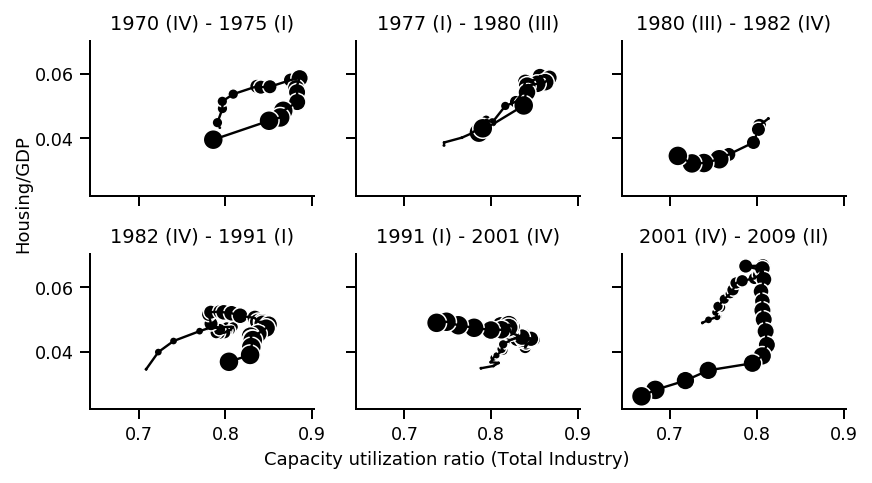

In [0]:
fig, ax = plt.subplots(2,3, sharex=True, sharey=True, squeeze=False)

sns.scatterplot(y = 'Housing share', x='TCU', data=df["1970-12":"1975-01"], ax=ax[0,0], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Housing share', x='TCU', data=df["1970-12":"1975-01"], ax=ax[0,0], sort=False, color = 'black')
ax[0,0].set_title("1970 (IV) - 1975 (I)")

sns.scatterplot(y = 'Housing share', x='TCU', data=df["1975-01":"1980-10"], ax=ax[0,1], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Housing share', x='TCU', data=df["1975-01":"1980-10"], ax=ax[0,1], sort=False, color = 'black')
ax[0,1].set_title("1977 (I) - 1980 (III)")

sns.scatterplot(y = 'Housing share', x='TCU', data=df["1980-10":"1982-12"], ax=ax[0,2], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Housing share', x='TCU', data=df["1980-10":"1982-12"], ax=ax[0,2], sort=False, color = 'black')
ax[0,2].set_title("1980 (III) - 1982 (IV)")

sns.scatterplot(y = 'Housing share', x='TCU', data=df["1982-12":"1991-01"], ax=ax[1,0], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Housing share', x='TCU', data=df["1982-12":"1991-01"], ax=ax[1,0], sort=False, color = 'black')
ax[1,0].set_title("1982 (IV) - 1991 (I)")

sns.scatterplot(y = 'Housing share', x='TCU', data=df["1991-01":"2001-12"], ax=ax[1,1], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Housing share', x='TCU', data=df["1991-01":"2001-12"], ax=ax[1,1], sort=False, color = 'black')
ax[1,1].set_title("1991 (I) - 2001 (IV)")

sns.scatterplot(y = 'Housing share', x='TCU', data=df["2001-12":"2009-07"], ax=ax[1,2], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Housing share', x='TCU', data=df["2001-12":"2009-07"], ax=ax[1,2], sort=False, color = 'black')
ax[1,2].set_title("2001 (IV) - 2009 (II)")


sns.despine()
ax[0,0].set_ylabel(""); ax[1,0].set_xlabel('')
ax[1,0].set_ylabel(""); ax[1,1].set_xlabel(''); ax[1,2].set_xlabel('')

fig.tight_layout(rect=[0, 0.03, 1, 0.90])
fig.text(0.5, 0.03, 'Capacity utilization ratio (Total Industry)', ha='center', fontsize =9)
fig.text(0, 0.5, 'Housing/GDP', va='center', rotation='vertical', fontsize=9)
#plt.suptitle("Housing share vs. Capacity utilization ratio\nTrough to trough\n(Markers size increases over time)")
fig.tight_layout(rect=[0, 0.03, 1, 0.85])
plt.show()

fig.savefig("Empiria.png", transparent = True, dpi = 300)

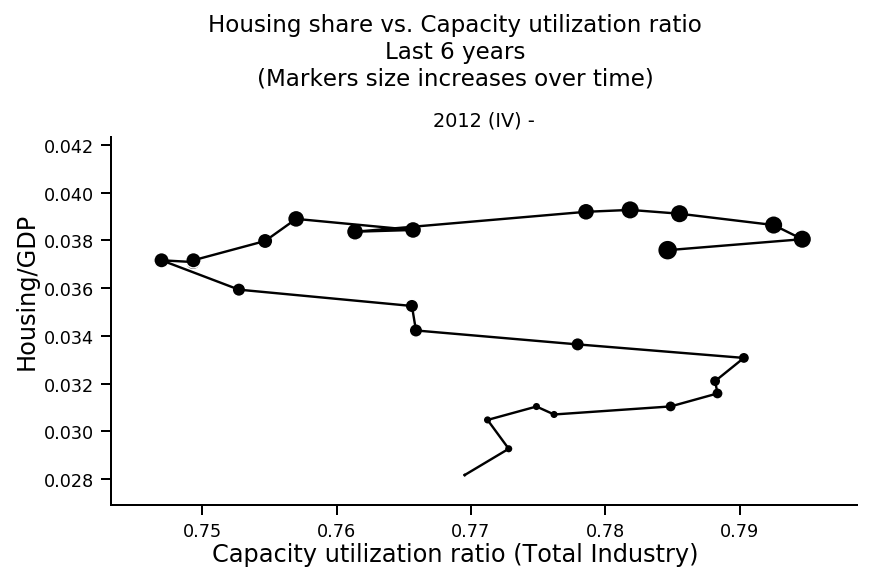

In [0]:
fig, ax = plt.subplots()

sns.scatterplot(y = 'Housing share', x='TCU', data=df["2012-12":], ax=ax, size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Housing share', x='TCU', data=df["2012-12":], ax=ax, sort=False, color = 'black')
ax.set_title("2012 (IV) -")

ax.set_ylabel(""); ax.set_xlabel('')

fig.tight_layout(rect=[0, 0.03, 1, 0.90])
fig.text(0.5, 0.03, 'Capacity utilization ratio (Total Industry)', ha='center', fontsize =12)
fig.text(-0.01, 0.5, 'Housing/GDP', va='center', rotation='vertical', fontsize=12)
plt.suptitle("Housing share vs. Capacity utilization ratio\nLast 6 years\n(Markers size increases over time)")
fig.tight_layout(rect=[0, 0.03, 1, 0.85])
sns.despine()
plt.show()

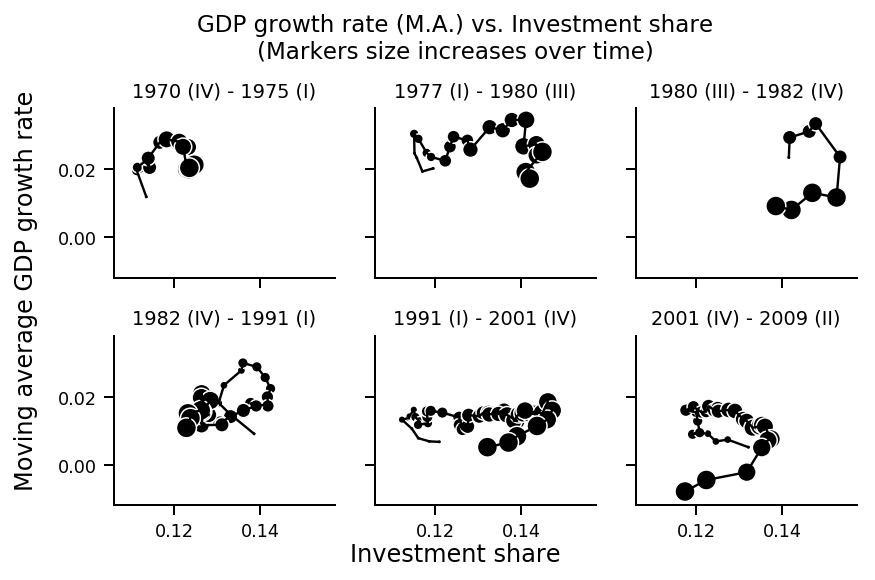

In [0]:
fig, ax = plt.subplots(2,3, sharex=True, sharey=True, squeeze=False)

sns.scatterplot(y = 'Moving average GDP growth rate', x='Investment share', data=df["1970-12":"1975-01"], ax=ax[0,0], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='Investment share', data=df["1970-12":"1975-01"], ax=ax[0,0], sort=False, color = 'black')
ax[0,0].set_title("1970 (IV) - 1975 (I)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='Investment share', data=df["1975-01":"1980-10"], ax=ax[0,1], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='Investment share', data=df["1975-01":"1980-10"], ax=ax[0,1], sort=False, color = 'black')
ax[0,1].set_title("1977 (I) - 1980 (III)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='Investment share', data=df["1980-10":"1982-12"], ax=ax[0,2], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='Investment share', data=df["1980-10":"1982-12"], ax=ax[0,2], sort=False, color = 'black')
ax[0,2].set_title("1980 (III) - 1982 (IV)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='Investment share', data=df["1982-12":"1991-01"], ax=ax[1,0], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='Investment share', data=df["1982-12":"1991-01"], ax=ax[1,0], sort=False, color = 'black')
ax[1,0].set_title("1982 (IV) - 1991 (I)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='Investment share', data=df["1991-01":"2001-12"], ax=ax[1,1], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='Investment share', data=df["1991-01":"2001-12"], ax=ax[1,1], sort=False, color = 'black')
ax[1,1].set_title("1991 (I) - 2001 (IV)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='Investment share', data=df["2001-12":"2009-07"], ax=ax[1,2], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='Investment share', data=df["2001-12":"2009-07"], ax=ax[1,2], sort=False, color = 'black')
ax[1,2].set_title("2001 (IV) - 2009 (II)")

sns.despine()
ax[0,0].set_ylabel(""); ax[1,0].set_xlabel('')
ax[1,0].set_ylabel(""); ax[1,1].set_xlabel(''); ax[1,2].set_xlabel('')

plt.suptitle("GDP growth rate (M.A.) vs. Investment share\n(Markers size increases over time)")
fig.tight_layout(rect=[0, 0.03, 1, 0.90])
fig.text(0.5, 0.03, 'Investment share', ha='center', fontsize =12)
fig.text(-0.01, 0.5, 'Moving average GDP growth rate', va='center', rotation='vertical', fontsize=12)
plt.show()

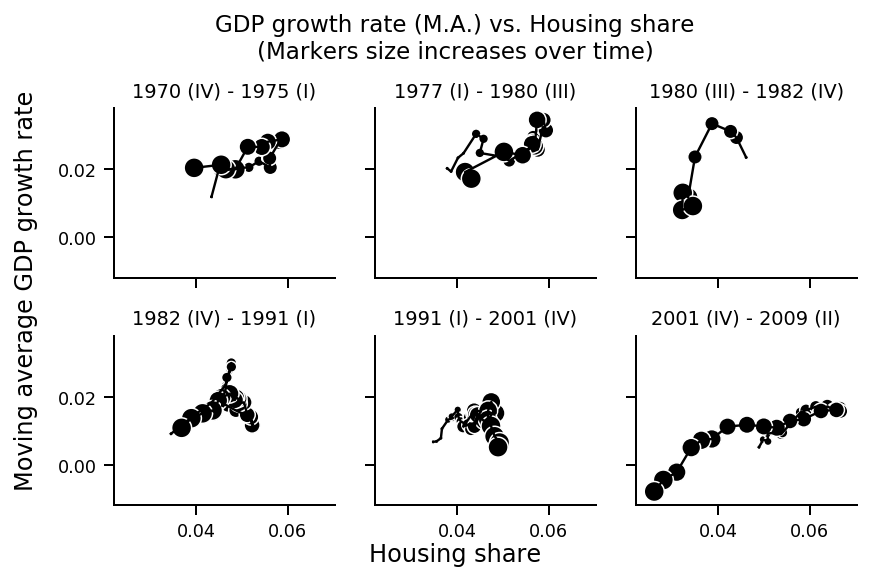

In [0]:
fig, ax = plt.subplots(2,3, sharex=True, sharey=True, squeeze=False)

sns.scatterplot(y = 'Moving average GDP growth rate', x='Housing share', data=df["1970-12":"1975-01"], ax=ax[0,0], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='Housing share', data=df["1970-12":"1975-01"], ax=ax[0,0], sort=False, color = 'black')
ax[0,0].set_title("1970 (IV) - 1975 (I)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='Housing share', data=df["1975-01":"1980-10"], ax=ax[0,1], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='Housing share', data=df["1975-01":"1980-10"], ax=ax[0,1], sort=False, color = 'black')
ax[0,1].set_title("1977 (I) - 1980 (III)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='Housing share', data=df["1980-10":"1982-12"], ax=ax[0,2], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='Housing share', data=df["1980-10":"1982-12"], ax=ax[0,2], sort=False, color = 'black')
ax[0,2].set_title("1980 (III) - 1982 (IV)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='Housing share', data=df["1982-12":"1991-01"], ax=ax[1,0], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='Housing share', data=df["1982-12":"1991-01"], ax=ax[1,0], sort=False, color = 'black')
ax[1,0].set_title("1982 (IV) - 1991 (I)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='Housing share', data=df["1991-01":"2001-12"], ax=ax[1,1], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='Housing share', data=df["1991-01":"2001-12"], ax=ax[1,1], sort=False, color = 'black')
ax[1,1].set_title("1991 (I) - 2001 (IV)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='Housing share', data=df["2001-12":"2009-07"], ax=ax[1,2], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='Housing share', data=df["2001-12":"2009-07"], ax=ax[1,2], sort=False, color = 'black')
ax[1,2].set_title("2001 (IV) - 2009 (II)")

sns.despine()
ax[0,0].set_ylabel(""); ax[1,0].set_xlabel('')
ax[1,0].set_ylabel(""); ax[1,1].set_xlabel(''); ax[1,2].set_xlabel('')

plt.suptitle("GDP growth rate (M.A.) vs. Housing share\n(Markers size increases over time)")
fig.tight_layout(rect=[0, 0.03, 1, 0.90])
fig.text(0.5, 0.03, 'Housing share', ha='center', fontsize =12)
fig.text(-0.01, 0.5, 'Moving average GDP growth rate', va='center', rotation='vertical', fontsize=12)
plt.show()

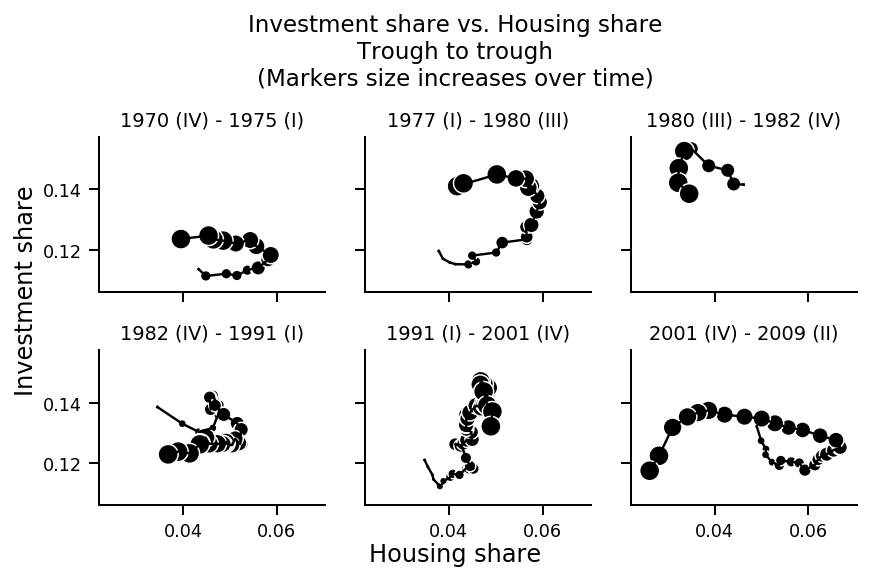

In [0]:
fig, ax = plt.subplots(2,3, sharex=True, sharey=True, squeeze=False)

sns.scatterplot(y = 'Investment share', x='Housing share', data=df["1970-12":"1975-01"], ax=ax[0,0], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Investment share', x='Housing share', data=df["1970-12":"1975-01"], ax=ax[0,0], sort=False, color = 'black')
ax[0,0].set_title("1970 (IV) - 1975 (I)")

sns.scatterplot(y = 'Investment share', x='Housing share', data=df["1975-01":"1980-10"], ax=ax[0,1], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Investment share', x='Housing share', data=df["1975-01":"1980-10"], ax=ax[0,1], sort=False, color = 'black')
ax[0,1].set_title("1977 (I) - 1980 (III)")

sns.scatterplot(y = 'Investment share', x='Housing share', data=df["1980-10":"1982-12"], ax=ax[0,2], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Investment share', x='Housing share', data=df["1980-10":"1982-12"], ax=ax[0,2], sort=False, color = 'black')
ax[0,2].set_title("1980 (III) - 1982 (IV)")

sns.scatterplot(y = 'Investment share', x='Housing share', data=df["1982-12":"1991-01"], ax=ax[1,0], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Investment share', x='Housing share', data=df["1982-12":"1991-01"], ax=ax[1,0], sort=False, color = 'black')
ax[1,0].set_title("1982 (IV) - 1991 (I)")

sns.scatterplot(y = 'Investment share', x='Housing share', data=df["1991-01":"2001-12"], ax=ax[1,1], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Investment share', x='Housing share', data=df["1991-01":"2001-12"], ax=ax[1,1], sort=False, color = 'black')
ax[1,1].set_title("1991 (I) - 2001 (IV)")

sns.scatterplot(y = 'Investment share', x='Housing share', data=df["2001-12":"2009-07"], ax=ax[1,2], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Investment share', x='Housing share', data=df["2001-12":"2009-07"], ax=ax[1,2], sort=False, color = 'black')
ax[1,2].set_title("2001 (IV) - 2009 (II)")

sns.despine()
ax[0,0].set_ylabel(""); ax[1,0].set_xlabel('')
ax[1,0].set_ylabel(""); ax[1,1].set_xlabel(''); ax[1,2].set_xlabel('')

plt.suptitle("Investment share vs. Housing share\nTrough to trough\n(Markers size increases over time)")
fig.tight_layout(rect=[0, 0.03, 1, 0.85])
fig.text(0.5, 0.03, 'Housing share', ha='center', fontsize =12)
fig.text(-0.01, 0.5, 'Investment share', va='center', rotation='vertical', fontsize=12)
plt.show()

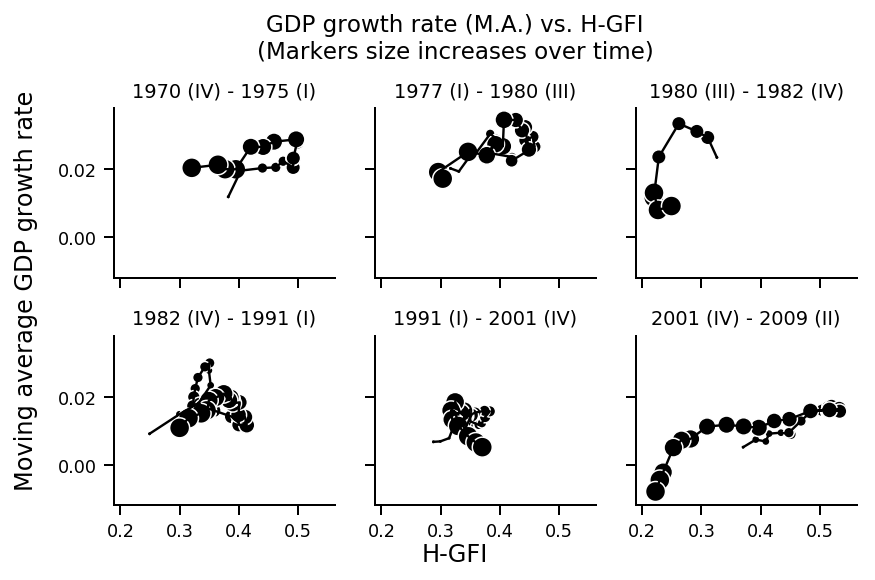

In [0]:
fig, ax = plt.subplots(2,3, sharex=True, sharey=True, squeeze=False)

sns.scatterplot(y = 'Moving average GDP growth rate', x='H-GFI', data=df["1970-12":"1975-01"], ax=ax[0,0], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='H-GFI', data=df["1970-12":"1975-01"], ax=ax[0,0], sort=False, color = 'black')
ax[0,0].set_title("1970 (IV) - 1975 (I)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='H-GFI', data=df["1975-01":"1980-10"], ax=ax[0,1], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='H-GFI', data=df["1975-01":"1980-10"], ax=ax[0,1], sort=False, color = 'black')
ax[0,1].set_title("1977 (I) - 1980 (III)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='H-GFI', data=df["1980-10":"1982-12"], ax=ax[0,2], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='H-GFI', data=df["1980-10":"1982-12"], ax=ax[0,2], sort=False, color = 'black')
ax[0,2].set_title("1980 (III) - 1982 (IV)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='H-GFI', data=df["1982-12":"1991-01"], ax=ax[1,0], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='H-GFI', data=df["1982-12":"1991-01"], ax=ax[1,0], sort=False, color = 'black')
ax[1,0].set_title("1982 (IV) - 1991 (I)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='H-GFI', data=df["1991-01":"2001-12"], ax=ax[1,1], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='H-GFI', data=df["1991-01":"2001-12"], ax=ax[1,1], sort=False, color = 'black')
ax[1,1].set_title("1991 (I) - 2001 (IV)")

sns.scatterplot(y = 'Moving average GDP growth rate', x='H-GFI', data=df["2001-12":"2009-07"], ax=ax[1,2], size='Year', sizes = (5,100), color = 'black', legend=False)
sns.lineplot(y = 'Moving average GDP growth rate', x='H-GFI', data=df["2001-12":"2009-07"], ax=ax[1,2], sort=False, color = 'black')
ax[1,2].set_title("2001 (IV) - 2009 (II)")

sns.despine()
ax[0,0].set_ylabel(""); ax[1,0].set_xlabel('')
ax[1,0].set_ylabel(""); ax[1,1].set_xlabel(''); ax[1,2].set_xlabel('')

plt.suptitle("GDP growth rate (M.A.) vs. H-GFI\n(Markers size increases over time)")
fig.tight_layout(rect=[0, 0.03, 1, 0.90])
fig.text(0.5, 0.03, 'H-GFI', ha='center', fontsize =12)
fig.text(-0.01, 0.5, 'Moving average GDP growth rate', va='center', rotation='vertical', fontsize=12)
plt.show()

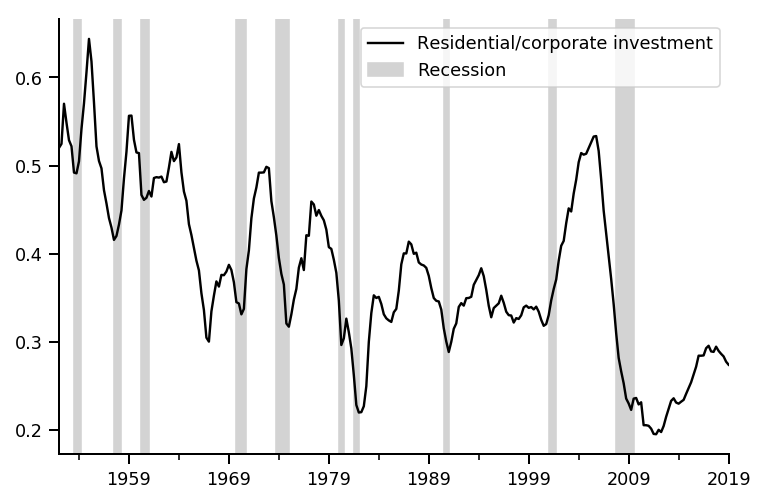

In [0]:
fig, ax = plt.subplots()

df['H-GFI'].plot(color = 'black', label = 'Residential/corporate investment', ax = ax)
ax.axvspan(xmin = "1953-07", xmax='1954-04', color = "lightgray", label = 'Recession')
ax.axvspan(xmin = "1957-08", xmax='1958-05', color = "lightgray", label = '')
ax.axvspan(xmin = "1960-05", xmax='1961-02', color = "lightgray", label = '')
ax.axvspan(xmin = "1969-12", xmax='1970-11', color = "lightgray", label = '')
ax.axvspan(xmin = "1973-11", xmax='1975-03', color = "lightgray", label = '')
ax.axvspan(xmin = "1980-01", xmax='1980-07', color = "lightgray", label = '')
ax.axvspan(xmin = "1981-07", xmax='1982-01', color = "lightgray", label = '')
ax.axvspan(xmin = "1990-07", xmax='1991-03', color = "lightgray", label = '')
ax.axvspan(xmin = "2001-03", xmax='2001-11', color = "lightgray", label = '')
ax.axvspan(xmin = "2007-12", xmax='2009-07', color = "lightgray", label = '')
ax.legend()
sns.despine()
plt.show()

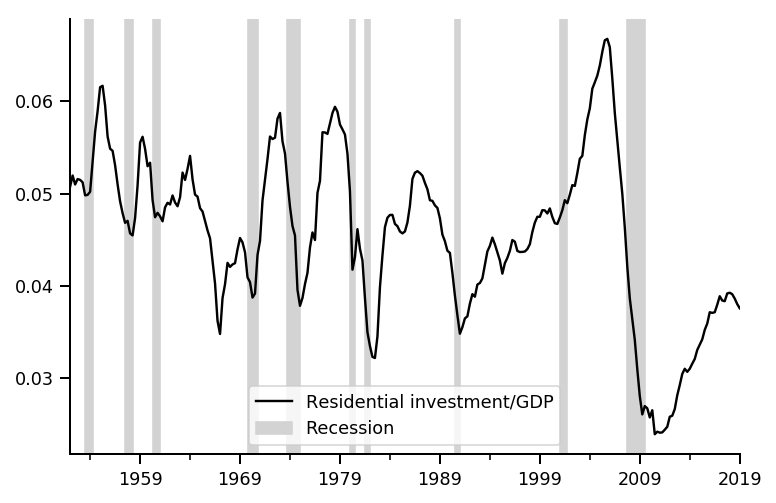

In [0]:
fig, ax = plt.subplots()

df['H-GDP'].plot(color = 'black', label = 'Residential investment/GDP', ax = ax)
ax.axvspan(xmin = "1953-07", xmax='1954-04', color = "lightgray", label = 'Recession')
ax.axvspan(xmin = "1957-08", xmax='1958-05', color = "lightgray", label = '')
ax.axvspan(xmin = "1960-05", xmax='1961-02', color = "lightgray", label = '')
ax.axvspan(xmin = "1969-12", xmax='1970-11', color = "lightgray", label = '')
ax.axvspan(xmin = "1973-11", xmax='1975-03', color = "lightgray", label = '')
ax.axvspan(xmin = "1980-01", xmax='1980-07', color = "lightgray", label = '')
ax.axvspan(xmin = "1981-07", xmax='1982-01', color = "lightgray", label = '')
ax.axvspan(xmin = "1990-07", xmax='1991-03', color = "lightgray", label = '')
ax.axvspan(xmin = "2001-03", xmax='2001-11', color = "lightgray", label = '')
ax.axvspan(xmin = "2007-12", xmax='2009-07', color = "lightgray", label = '')
ax.legend()
sns.despine()
plt.show()

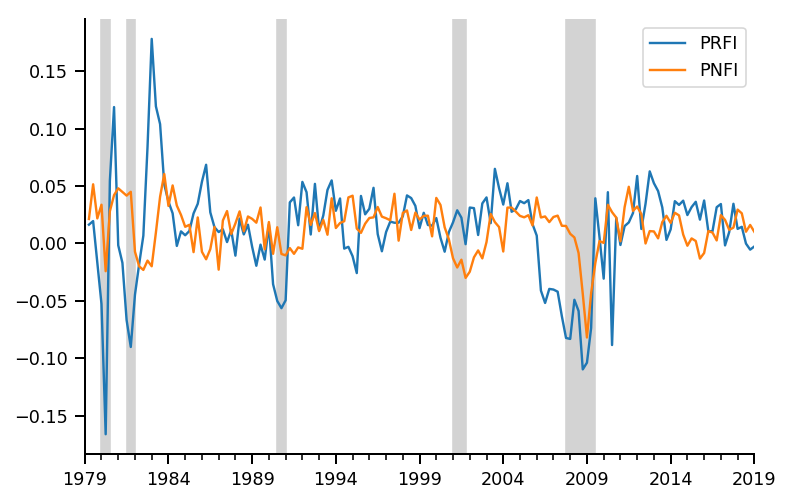

In [0]:
fig, ax = plt.subplots()

df[['PRFI', 'PNFI']]["1979":].pct_change().plot( label = ('Residential', 'Non-Residential'), ax = ax)
#ax.axvspan(xmin = "1953-07", xmax='1954-04', color = "lightgray", label = 'Peak to trough')
#ax.axvspan(xmin = "1957-08", xmax='1958-05', color = "lightgray", label = '')
#ax.axvspan(xmin = "1960-05", xmax='1961-02', color = "lightgray", label = '')
#ax.axvspan(xmin = "1969-12", xmax='1970-11', color = "lightgray", label = '')
#ax.axvspan(xmin = "1973-11", xmax='1975-03', color = "lightgray", label = '')
ax.axvspan(xmin = "1980-01", xmax='1980-07', color = "lightgray", label = '')
ax.axvspan(xmin = "1981-07", xmax='1982-01', color = "lightgray", label = '')
ax.axvspan(xmin = "1990-07", xmax='1991-03', color = "lightgray", label = '')
ax.axvspan(xmin = "2001-03", xmax='2001-11', color = "lightgray", label = '')
ax.axvspan(xmin = "2007-12", xmax='2009-07', color = "lightgray", label = '')
ax.legend()
sns.despine()
plt.show()

# Granger causality test

$$
\begin{cases}
H_0: \text{The the second ts does NOT Granger cause the ts in the first one}\\
H_1: \text{The the second ts DOES Granger cause the ts in the first one}\\
\end{cases}
$$

**p-value criteria:** $p < 1\% \Rightarrow $ Reject null-hypothesis

In [0]:
print("Testing for private residential investment granger cause GDP\n")
granger_test = Granger(x = df[["GDP", "PRFI"]].pct_change().dropna(), maxlag = 4, verbose=True, addconst=True)
print('\n')
print(granger_test[2][1][0].summary())

Testing for private residential investment granger cause GDP


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=24.7243 , p=0.0000  , df_denom=264, df_num=1
ssr based chi2 test:   chi2=25.0053 , p=0.0000  , df=1
likelihood ratio test: chi2=23.9027 , p=0.0000  , df=1
parameter F test:         F=24.7243 , p=0.0000  , df_denom=264, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=16.0671 , p=0.0000  , df_denom=261, df_num=2
ssr based chi2 test:   chi2=32.7497 , p=0.0000  , df=2
likelihood ratio test: chi2=30.8852 , p=0.0000  , df=2
parameter F test:         F=16.0671 , p=0.0000  , df_denom=261, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.1033 , p=0.0000  , df_denom=258, df_num=3
ssr based chi2 test:   chi2=40.3764 , p=0.0000  , df=3
likelihood ratio test: chi2=37.5811 , p=0.0000  , df=3
parameter F test:         F=13.1033 , p=0.0000  , df_denom=258, df_num=3

Granger Causality
number of lag

In [0]:
print("Testing for GDP granger cause private residental investment\n")
granger_test = Granger(x = df[["PRFI", 'GDP']].pct_change().dropna(), maxlag = 4, verbose=True, addconst=True)
print('\n')
print(granger_test[2][1][0].summary())

Testing for GDP granger cause private residental investment


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.3165  , p=0.0126  , df_denom=264, df_num=1
ssr based chi2 test:   chi2=6.3883  , p=0.0115  , df=1
likelihood ratio test: chi2=6.3130  , p=0.0120  , df=1
parameter F test:         F=6.3165  , p=0.0126  , df_denom=264, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.7515  , p=0.0036  , df_denom=261, df_num=2
ssr based chi2 test:   chi2=11.7233 , p=0.0028  , df=2
likelihood ratio test: chi2=11.4723 , p=0.0032  , df=2
parameter F test:         F=5.7515  , p=0.0036  , df_denom=261, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.9243  , p=0.0092  , df_denom=258, df_num=3
ssr based chi2 test:   chi2=12.0922 , p=0.0071  , df=3
likelihood ratio test: chi2=11.8244 , p=0.0080  , df=3
parameter F test:         F=3.9243  , p=0.0092  , df_denom=258, df_num=3

Granger Causality
number of lags

In [0]:
print("Testing for GDP granger cause private non-residential investment\n")
granger_test = Granger(x = df[["PNFI", 'GDP']].pct_change().dropna(), maxlag = 4, verbose=True, addconst=True)
print('\n')
print(granger_test[2][1][0].summary())

Testing for GDP granger cause private non-residential investment


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=47.5667 , p=0.0000  , df_denom=264, df_num=1
ssr based chi2 test:   chi2=48.1072 , p=0.0000  , df=1
likelihood ratio test: chi2=44.2324 , p=0.0000  , df=1
parameter F test:         F=47.5667 , p=0.0000  , df_denom=264, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=24.1193 , p=0.0000  , df_denom=261, df_num=2
ssr based chi2 test:   chi2=49.1628 , p=0.0000  , df=2
likelihood ratio test: chi2=45.1117 , p=0.0000  , df=2
parameter F test:         F=24.1193 , p=0.0000  , df_denom=261, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=11.4575 , p=0.0000  , df_denom=258, df_num=3
ssr based chi2 test:   chi2=35.3052 , p=0.0000  , df=3
likelihood ratio test: chi2=33.1434 , p=0.0000  , df=3
parameter F test:         F=11.4575 , p=0.0000  , df_denom=258, df_num=3

Granger Causality
number of

In [0]:
print("Testing for private non-residential investment granger cause GDP\n")
granger_test = Granger(x = df[["GDP", 'PNFI']].pct_change().dropna(), maxlag = 4, verbose=True, addconst=True)
print('\n')
print(granger_test[2][1][0].summary())

Testing for private non-residential investment granger cause GDP


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3071  , p=0.5799  , df_denom=264, df_num=1
ssr based chi2 test:   chi2=0.3106  , p=0.5773  , df=1
likelihood ratio test: chi2=0.3105  , p=0.5774  , df=1
parameter F test:         F=0.3071  , p=0.5799  , df_denom=264, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6079  , p=0.0756  , df_denom=261, df_num=2
ssr based chi2 test:   chi2=5.3156  , p=0.0701  , df=2
likelihood ratio test: chi2=5.2632  , p=0.0720  , df=2
parameter F test:         F=2.6079  , p=0.0756  , df_denom=261, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4591  , p=0.0633  , df_denom=258, df_num=3
ssr based chi2 test:   chi2=7.5775  , p=0.0556  , df=3
likelihood ratio test: chi2=7.4712  , p=0.0583  , df=3
parameter F test:         F=2.4591  , p=0.0633  , df_denom=258, df_num=3

Granger Causality
number of

In [0]:
print("Testing for private residential investment granger cause private non-residential investment\n")
granger_test = Granger(x = df[["PNFI", 'PRFI']].pct_change().dropna(), maxlag = 4, verbose=True, addconst=True)
print('\n')
print(granger_test[2][1][0].summary())

Testing for private residential investment granger cause private non-residential investment


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=19.8863 , p=0.0000  , df_denom=264, df_num=1
ssr based chi2 test:   chi2=20.1123 , p=0.0000  , df=1
likelihood ratio test: chi2=19.3908 , p=0.0000  , df=1
parameter F test:         F=19.8863 , p=0.0000  , df_denom=264, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=16.4088 , p=0.0000  , df_denom=261, df_num=2
ssr based chi2 test:   chi2=33.4464 , p=0.0000  , df=2
likelihood ratio test: chi2=31.5048 , p=0.0000  , df=2
parameter F test:         F=16.4088 , p=0.0000  , df_denom=261, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=11.0743 , p=0.0000  , df_denom=258, df_num=3
ssr based chi2 test:   chi2=34.1244 , p=0.0000  , df=3
likelihood ratio test: chi2=32.0993 , p=0.0000  , df=3
parameter F test:         F=11.0743 , p=0.0000  , df_denom=258, df_num=3



In [0]:
print("Testing for private non-residential investment granger cause private residential investment\n")
granger_test = Granger(x = df[["PRFI", 'PNFI']].pct_change().dropna(), maxlag = 4, verbose=True, addconst=True)
print('\n')
print(granger_test[2][1][0].summary())

Testing for private non-residential investment granger cause private residential investment


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=24.3068 , p=0.0000  , df_denom=264, df_num=1
ssr based chi2 test:   chi2=24.5830 , p=0.0000  , df=1
likelihood ratio test: chi2=23.5163 , p=0.0000  , df=1
parameter F test:         F=24.3068 , p=0.0000  , df_denom=264, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=14.7146 , p=0.0000  , df_denom=261, df_num=2
ssr based chi2 test:   chi2=29.9930 , p=0.0000  , df=2
likelihood ratio test: chi2=28.4193 , p=0.0000  , df=2
parameter F test:         F=14.7146 , p=0.0000  , df_denom=261, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.7194  , p=0.0000  , df_denom=258, df_num=3
ssr based chi2 test:   chi2=29.9494 , p=0.0000  , df=3
likelihood ratio test: chi2=28.3746 , p=0.0000  , df=3
parameter F test:         F=9.7194  , p=0.0000  , df_denom=258, df_num=3



# Autonomous expenditures


In [0]:
recessions = web.get_data_fred('USRECM', start, end)
recessions.columns = ['Recessions']
recessions['xmin'] = False
recessions['xmax'] = False
for i in range(len(recessions['Recessions'])-1):
  recessions.iscopy = True
  if recessions['Recessions'].iloc[i] == 0 and recessions['Recessions'].iloc[i+1] == 1:
      recessions['xmin'].iloc[i+1] = True
  elif recessions['Recessions'].iloc[i] == 1 and recessions['Recessions'].iloc[i+1] == 0:
      recessions['xmax'].iloc[i+1] = True
recessions.head()

def recessions_bars():
    import matplotlib.pyplot as plt
    xmin = recessions[recessions['xmin'] == True]['xmin']
    xmax = recessions[recessions['xmax'] == True]['xmax']
    
    for i in range(len(xmax)):
        ax.axvspan(xmin = xmin.index[i], xmax = xmax.index[i], alpha=.3, color='k')
        
print(recessions['xmin'][recessions['xmin'] == True].index)
recessions['xmax'][recessions['xmax'] == True]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


DatetimeIndex(['1953-07-01', '1957-08-01', '1960-04-01', '1969-12-01',
               '1973-11-01', '1980-01-01', '1981-07-01', '1990-07-01',
               '2001-03-01', '2007-12-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)


DATE
1954-06-01    True
1958-05-01    True
1961-03-01    True
1970-12-01    True
1975-04-01    True
1980-08-01    True
1982-12-01    True
1991-04-01    True
2001-12-01    True
2009-07-01    True
Name: xmax, dtype: bool

In [0]:
df = web.get_data_fred(
    [
     'GDPC96',
     'GDP',
     'EXPGSC96',
     'GCEC96',
     'A011RE1Q156NBEA',
     'HCCSDODNS', #'TOTALSL',
     'A008RE1Q156NBEA',
     'PCECC96',
     'IMPGS'
    ],
    start,
    end
)

df.columns = [
    'GDP',
    'Nominal GDP',
    'Exports', 
    'Government spending',
    'Residential Investment',
    'Consumer credit',
    'Private non-residential investment',
    'Consumption',
    'Imports'
]

df = df.resample('QS').mean()

df['Residential Investment'] = df['Residential Investment']*df['GDP']/100
df['Private non-residential investment'] = df['Private non-residential investment']*df['GDP']/100


df.tail()

,GDP,Nominal GDP,Exports,Government spending,Residential Investment,Consumer credit,Private non-residential investment,Consumption,Imports
DATE,,,,,,,,,
2018-01-01,NaN,20041.047,NaN,NaN,NaN,3862.514,NaN,12722.839,3116.568
2018-04-01,NaN,20411.924,NaN,NaN,NaN,3890.973,NaN,12842.022,3118.496
2018-07-01,NaN,20658.204,NaN,NaN,NaN,3956.860,NaN,12953.291,3192.091
2018-10-01,NaN,20865.140,NaN,NaN,NaN,4017.879,NaN,13032.299,3199.529
2019-01-01,NaN,21062.691,NaN,NaN,NaN,NaN,NaN,13070.997,3145.393


In [0]:
Z = [
    'Exports',
    'Government spending',
    'Residential Investment',
    'Consumer credit'
]


df['Autonomous'] = df[Z].sum(axis = 1)
df = df["1980":"2015"]

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


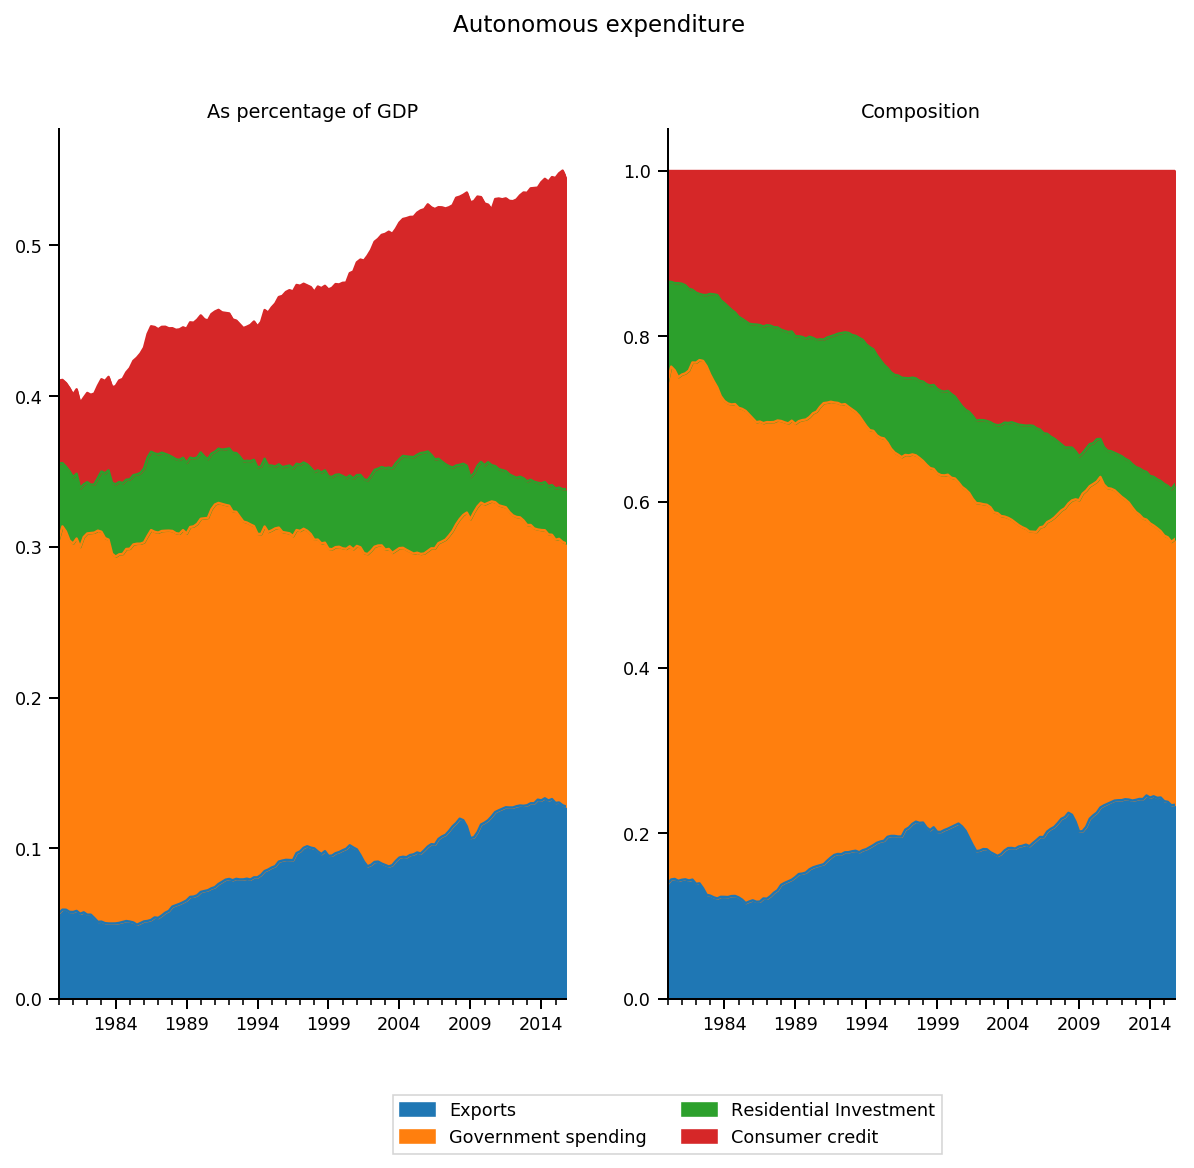

In [0]:
fig, ax = plt.subplots(1,2, figsize=(10,8))


df[Z].apply(lambda x: x/df['GDP']).plot(kind='area', stacked = True, ax = ax[0], legend = False)
ax[0].set_title('As percentage of GDP')
ax[0].set_xlabel('')

df[Z].apply(lambda x: x/df['Autonomous']).plot(kind='area', stacked = True, ax = ax[1])
ax[1].set_title('Composition')
ax[1].set_xlabel('')

ax[1].legend(loc='upper center', bbox_to_anchor=(0, -0.1),
          fancybox=False, shadow=False, ncol=2)
sns.despine()
fig.suptitle('Autonomous expenditure')
fig.tight_layout(rect=[0, .95, 1, 0.95])
plt.show()

In [0]:
df['m'] = df['Imports']/df['Nominal GDP']
df['h'] = df['Private non-residential investment']/df['GDP']
df['s'] = 1 - (df['Consumption'] - df['Consumer credit'])/df['GDP']

df['SSM'] = 1/(df['m'] + df['s'] - df['h'])
df['GDP (SSM)'] = df['Autonomous']*df['SSM']

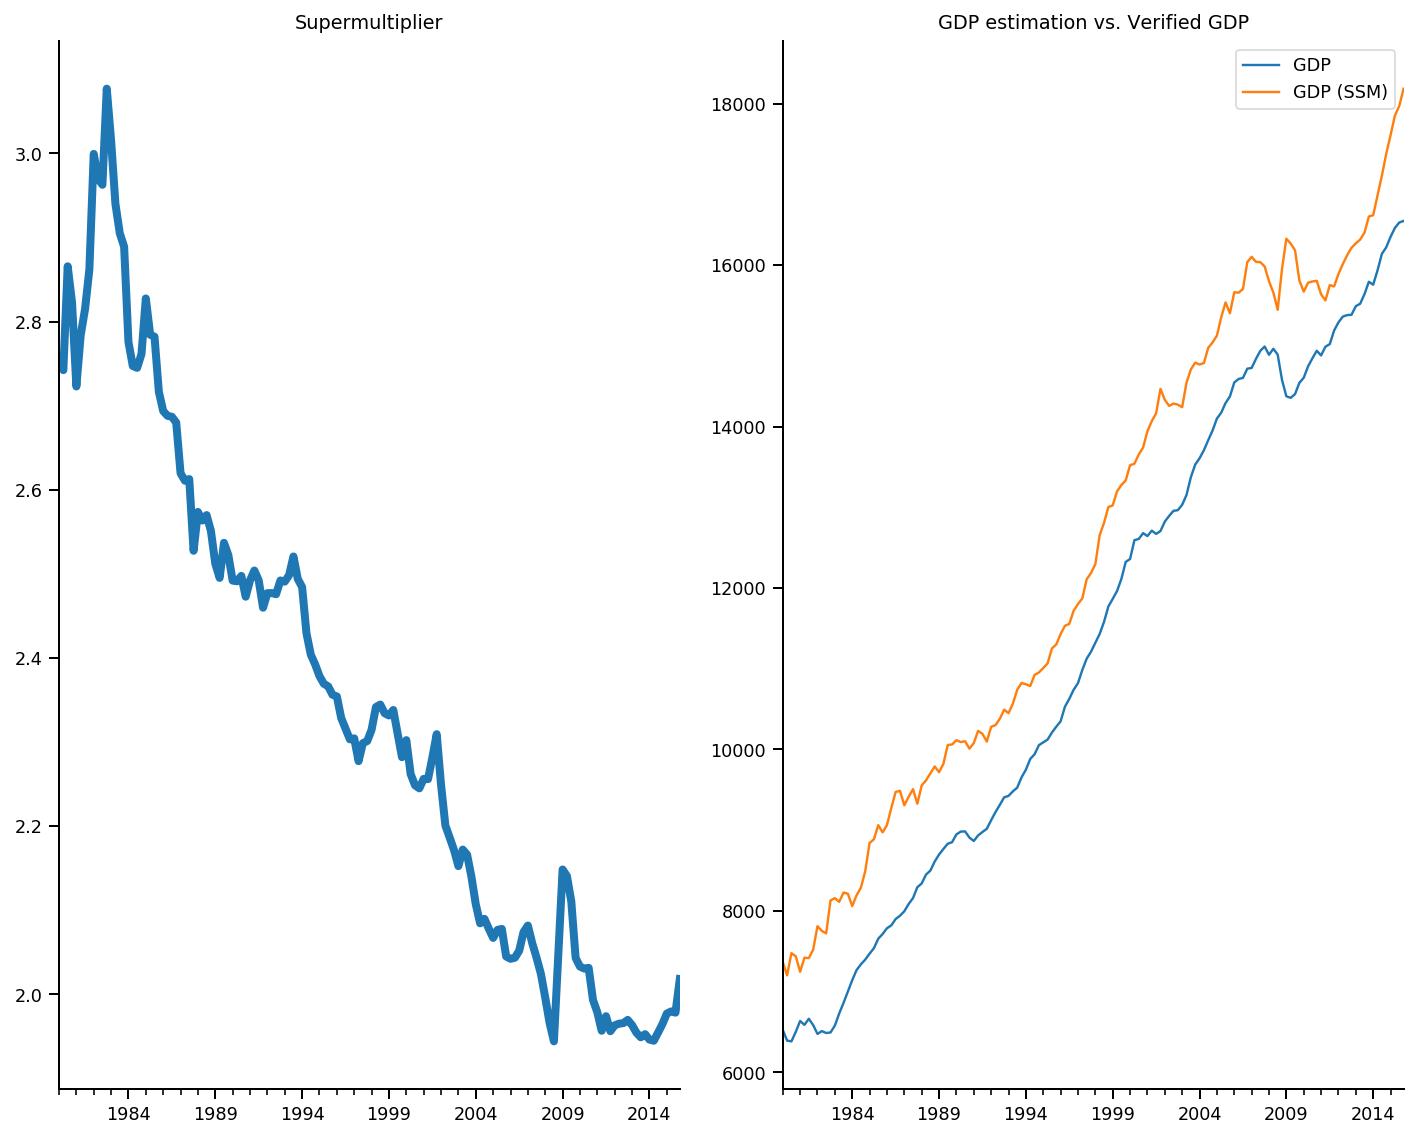

In [0]:
fig, ax = plt.subplots(1,2, figsize=(10,8))

df['SSM'].plot(lw=4, title = 'Supermultiplier', ax = ax[0])
ax[0].set_xlabel('')

df[['GDP','GDP (SSM)']].plot(ax=ax[1], title = 'GDP estimation vs. Verified GDP')
ax[1].set_xlabel('')

sns.despine()
fig.tight_layout()
plt.show()

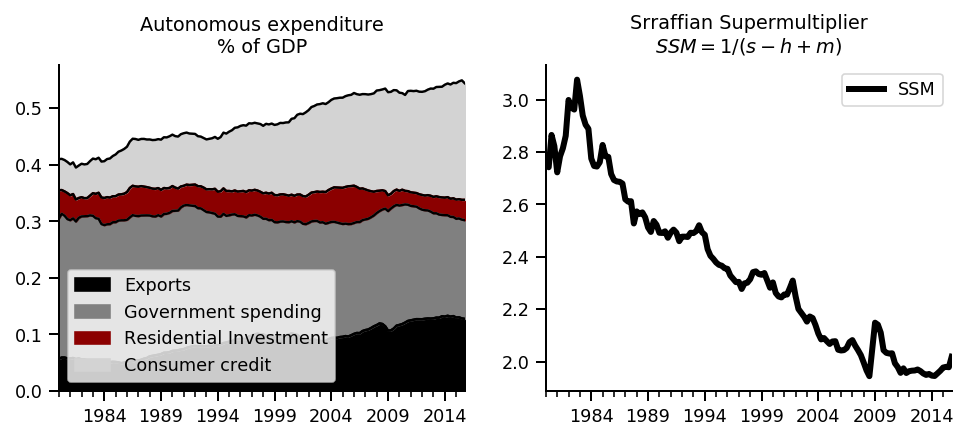

In [0]:
fig, ax = plt.subplots(1,2, figsize=(8,3))


df[Z].apply(lambda x: x/df['GDP']).plot(kind='area', stacked = True, ax = ax[0], legend = False,
                                       color = ('black', 'grey', 'darkred', 'lightgrey',))

ax[0].legend(loc='upper center', bbox_to_anchor=(.5, -0.1),
          fancybox=False, shadow=False, ncol=2)

df[Z].apply(lambda x: x/df['GDP']).plot(kind='line', stacked = True, ax = ax[0], legend = False, color = 'black', label = '')
ax[0].set_title('Autonomous expenditure\n% of GDP')
ax[0].set_xlabel('')

df['SSM'].plot(lw=3, ax = ax[1], title = 'Srraffian Supermultiplier\n$SSM = 1/(s-h+m)$', color = 'black')
ax[1].legend()
ax[1].set_xlabel('')


sns.despine()
#fig.suptitle('')
plt.savefig('Autonomous.png')
plt.show()

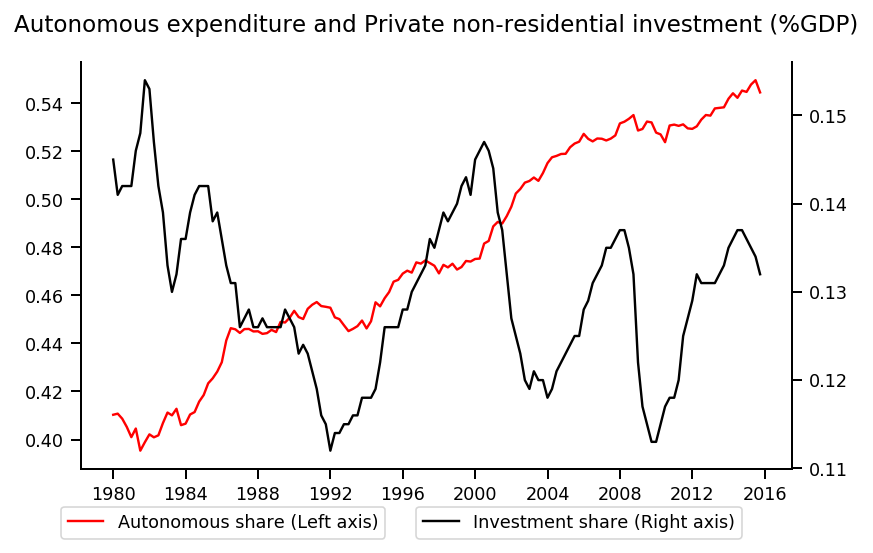

In [0]:
fig, ax1 = plt.subplots()
fig.suptitle('Autonomous expenditure and Private non-residential investment (%GDP)')
ax1.plot(df['Autonomous']/df['GDP'], color='red', label='Autonomous share (Left axis)')
plt.legend(loc='upper center', bbox_to_anchor=(0.2, -0.07))
ax2 = ax1.twinx()
ax2.plot(df['Private non-residential investment']/df['GDP'], color='k', label='Investment share (Right axis)')
sns.despine(right=False)
plt.legend(loc='upper center', bbox_to_anchor=(0.7, -0.07))
fig.tight_layout(rect=[0, .03, 1, 0.95])
plt.show()

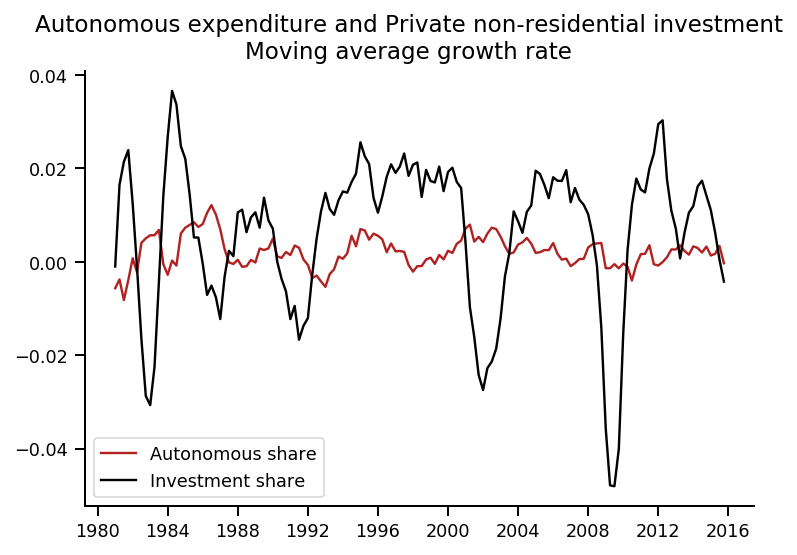

In [0]:
fig, ax = plt.subplots()
fig.suptitle('Autonomous expenditure and Private non-residential investment\nMoving average growth rate')
#ax.set_title('Seasonlly adjusted growth rate as %GDP')
ax.plot((df['Autonomous']/df['GDP']).rolling(4).mean().pct_change(), color='firebrick', label='Autonomous share')
ax.plot((df['Private non-residential investment']).rolling(4).mean().pct_change(), color='k', label='Investment share')
sns.despine()
plt.legend()
plt.show()
#fig.savefig('Autonomous_Invetment_grw.png', transparent=True, dpi=300)